In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


from sklearn.metrics import mean_absolute_error as mse

In [4]:
# Load the dataset
df_denmark = pd.read_csv('C:/Users/a0095989/Desktop/important/Thesis/Model_Thesis/imputed_deu_data01.csv')

df_denmark.index = pd.to_datetime(df_denmark.dt)

df_denmark = df_denmark.drop(['dt','AverageTemperatureUncertainty'], axis = 1)
df_denmark.describe()

,AverageTemperature,TemperatureAnomaly,Year,Month,TemperatureChange
count,262359.000000,2.623590e+05,262359.000000,262359.000000,262278.000000
mean,8.489331,1.280477e-16,1878.291757,6.498919,0.002417
std,6.778794,6.738203e+00,77.918891,3.452044,4.064085
min,-12.008000,-1.940859e+01,1743.000000,1.000000,-13.345000
25%,2.810000,-5.726850e+00,1811.000000,3.000000,-3.250000
50%,8.399000,-1.466057e-01,1878.000000,6.000000,0.203000
75%,14.816000,6.317656e+00,1946.000000,9.000000,3.099000
max,23.795000,1.489941e+01,2013.000000,12.000000,16.573000


In [5]:
ts = df_denmark['AverageTemperature']
ts

dt
1743-11-01     6.425
1743-12-01     0.689
1744-01-01    -0.673
1744-02-01     0.762
1744-03-01     3.754
               ...  
2013-05-01    11.463
2013-06-01    15.589
2013-07-01    19.869
2013-08-01    18.098
2013-09-01    13.725
Name: AverageTemperature, Length: 262359, dtype: float64

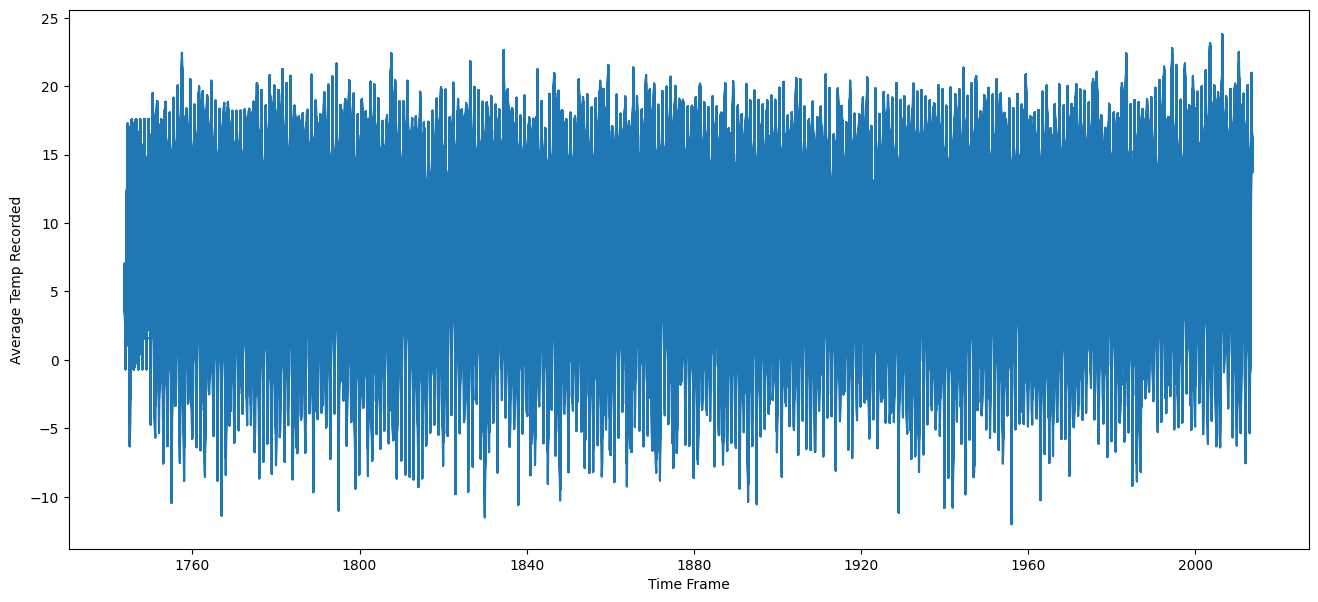

In [23]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Time Frame")
ax1.set_ylabel("Average Temp Recorded")
ax1.plot(ts);

In [28]:
# Perform Augmented Dicky-fuller test:
# ADF-test - nul hypothesis - nan stationary - if p_value < 5%  reject null hypothesis 
adfuller_res = adfuller(ts,autolag="AIC")

print(f'ADF Statistic:{adfuller_res[0]}')
print(f'P_value: {adfuller_res[1]}')

for key, value in adfuller_res[4].items():
    print('Critical Value')
    print(f' {key},{value}')

ADF Statistic:-17.09132613399237
P_value: 7.587151642020363e-30
Critical Value
 1%,-3.4303749333292775
Critical Value
 5%,-2.8615510202160492
Critical Value
 10%,-2.566775865662285


In [29]:
newModel = ARIMA(ts,order=(1,0,1))
result = newModel.fit()
predict = result.predict('01/01/1990','01/01/1991')
predict

c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

dt
1990-01-01     5.192147
1990-02-01     4.460926
1990-03-01     8.227112
1990-04-01     7.793725
1990-05-01     7.985101
1990-06-01    15.438641
1990-07-01    13.316923
1990-08-01    16.406660
1990-09-01    17.472626
1990-10-01     9.307167
1990-11-01    11.531798
1990-12-01     3.705511
1991-01-01     2.846443
Name: predicted_mean, dtype: float64

In [33]:
import itertools

i = j = z = range(0, 4)
ijz = itertools.product(i, j,z)

for parameters in ijz:
    try:
        mod = ARIMA(ts, order=parameters)
        result = mod.fit()
        print('ARIMA{} - AIC:{}'.format(parameters, result.aic))
    except:
        continue

c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(0, 0, 0) - AIC:1748750.478437407


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(0, 0, 1) - AIC:1537844.1029491401


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(0, 0, 2) - AIC:1432917.9104025192


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(0, 0, 3) - AIC:1378139.139842772


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(0, 1, 0) - AIC:1480514.277728935


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(0, 1, 1) - AIC:1439353.3795721154


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(0, 1, 2) - AIC:1410337.400742632


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(0, 1, 3) - AIC:1431921.5871674654


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(0, 2, 0) - AIC:1501057.4490988005


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(0, 2, 1) - AIC:1469546.0213242036


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(0, 2, 2) - AIC:1456083.8581339198


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(0, 2, 3) - AIC:1410346.6792743893


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(0, 3, 0) - AIC:1765312.000176362


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(0, 3, 1) - AIC:1501087.4792986554


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(0, 3, 2) - AIC:1532545.2880339865


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(0, 3, 3) - AIC:1456101.5322807145


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(1, 0, 0) - AIC:1455799.8918103524


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(1, 0, 1) - AIC:1403810.2079503413


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(1, 0, 2) - AIC:1366777.7855603385


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(1, 0, 3) - AIC:1342414.0014034437


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(1, 1, 0) - AIC:1418366.5195828222


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(1, 1, 1) - AIC:1416297.6226000811


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(1, 1, 2) - AIC:1403739.6292015796


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(1, 1, 3) - AIC:1387454.600559214


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(1, 2, 0) - AIC:1462649.6217619164


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(1, 2, 1) - AIC:1462399.5832816951


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(1, 2, 2) - AIC:1455044.7519285677


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(1, 2, 3) - AIC:1396496.9882439948


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(1, 3, 0) - AIC:1591024.5612440517


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(1, 3, 1) - AIC:1462663.8515516052


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(1, 3, 2) - AIC:1462413.2755972047


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(1, 3, 3) - AIC:1455059.7225344246


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(2, 0, 0) - AIC:1336995.8241745194


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(2, 0, 1) - AIC:1219553.6072118424


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(2, 0, 2) - AIC:1115017.2533352792


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(2, 0, 3) - AIC:1092381.2523176537


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(2, 1, 0) - AIC:1413525.8447250368


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(2, 1, 1) - AIC:1410225.6569112076


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(2, 1, 2) - AIC:1181373.9905731883


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(2, 1, 3) - AIC:1076944.119629655


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(2, 2, 0) - AIC:1462260.9395099285


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(2, 2, 1) - AIC:1461938.08109849


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(2, 2, 2) - AIC:1451451.3484371456


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(2, 2, 3) - AIC:1225156.9086578945


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(2, 3, 0) - AIC:1532346.0500409773


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(2, 3, 1) - AIC:1462274.080310474


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(2, 3, 2) - AIC:1462567.2258071133


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(2, 3, 3) - AIC:1451465.8946915907


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(3, 0, 0) - AIC:1243262.8887118576


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(3, 0, 1) - AIC:1183227.178880801


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(3, 0, 2) - AIC:1085650.6435414322


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(3, 0, 3) - AIC:1115766.9239114332


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(3, 1, 0) - AIC:1396248.6947482808


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(3, 1, 1) - AIC:1239507.189232118


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(3, 1, 2) - AIC:1134521.518939082


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(3, 1, 3) - AIC:1073874.8028985625


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(3, 2, 0) - AIC:1459746.9050433568


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(3, 2, 1) - AIC:1459573.270703086


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(3, 2, 2) - AIC:1336574.7085987437


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(3, 2, 3) - AIC:1237028.1355344735


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(3, 3, 0) - AIC:1522114.9013468346


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(3, 3, 1) - AIC:1459758.8966187113


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(3, 3, 2) - AIC:1461401.3306287155


c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

ARIMA(3, 3, 3) - AIC:1462204.7242253032


In [13]:
newModel = ARIMA(ts,order=(3,0,2))
result = newModel.fit()
predict = result.predict('01/01/1990','01/01/1991')
predict

c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\a0095989\Desktop\important\Thesis\Model_Thesis\model\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has bee

dt
1990-01-01     0.994895
1990-02-01     2.235414
1990-03-01     5.846512
1990-04-01     9.163475
1990-05-01    11.846136
1990-06-01    15.989745
1990-07-01    16.475186
1990-08-01    15.966568
1990-09-01    14.306016
1990-10-01     8.843174
1990-11-01     5.888782
1990-12-01     1.927711
1991-01-01     0.413600
Name: predicted_mean, dtype: float64

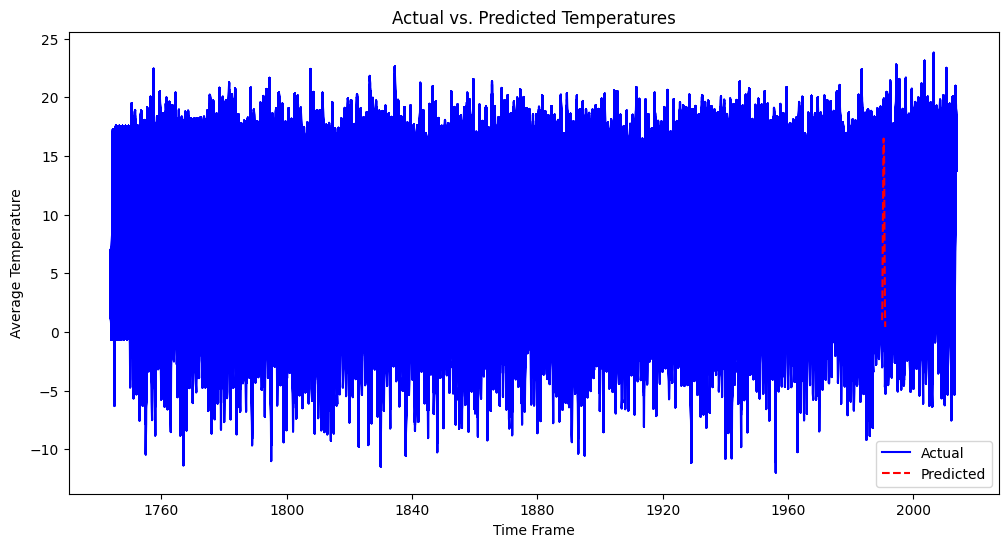

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(ts, label="Actual", color="blue")
plt.plot(predict, label="Predicted", color="red", linestyle="dashed")
plt.xlabel("Time Frame")
plt.ylabel("Average Temperature")
plt.title("Actual vs. Predicted Temperatures")
plt.legend()
plt.show()
